In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy.misc import electrocardiogram
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ecg = electrocardiogram()
ecg

C:\Users\kubra\AppData\Local\Temp\ipykernel_3660\3231816656.py:1: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

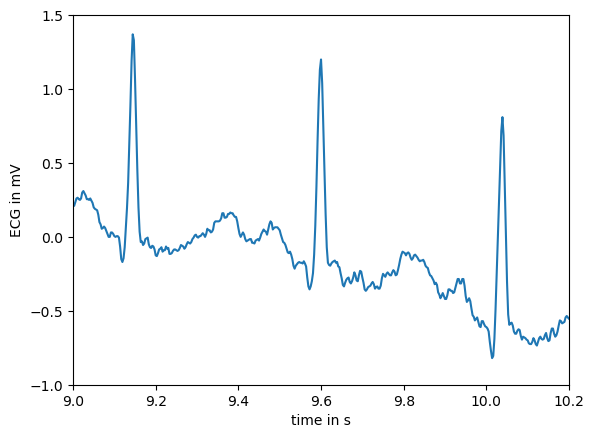

In [11]:
#normal sinus rhythm
'''
As stated the signal features several areas with a different morphology. E.g., 
the first few seconds show the electrical activity of a heart in normal sinus rhythm as seen below'''
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

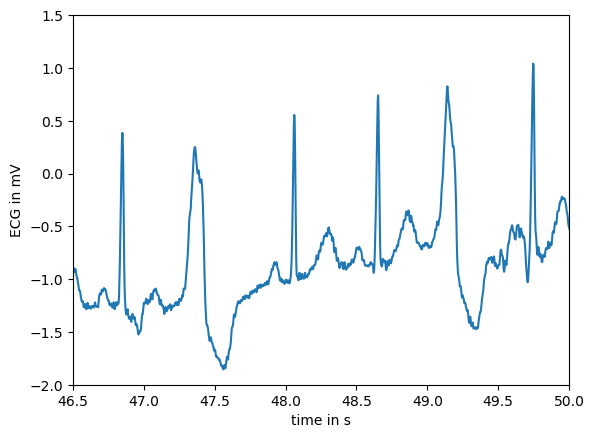

In [12]:
'''
 ikinci 16'dan sonra ekstrasistol olarak da adlandırılan ilk erken ventriküler kasılmalar ortaya çıkar. 
 Bunlar tipik kalp atışlarına kıyasla farklı bir morfolojiye sahiptir. 
 Fark aşağıdaki grafikte kolayca gözlemlenebilir'''
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(46.5, 50)
plt.ylim(-2, 1.5)
plt.show()

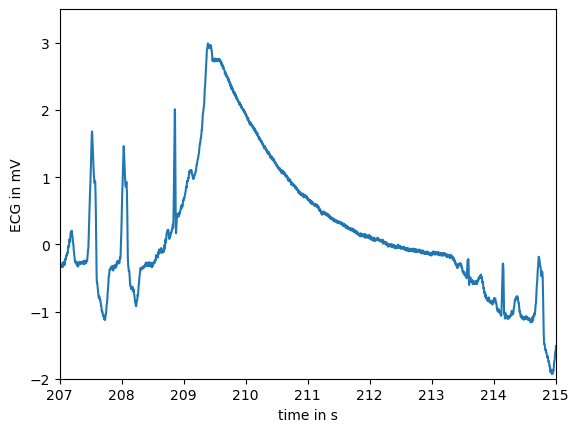

In [13]:
#Birçok noktada büyük artefaktlar kaydı bozuyor
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(207, 215)
plt.ylim(-2, 3.5)
plt.show()

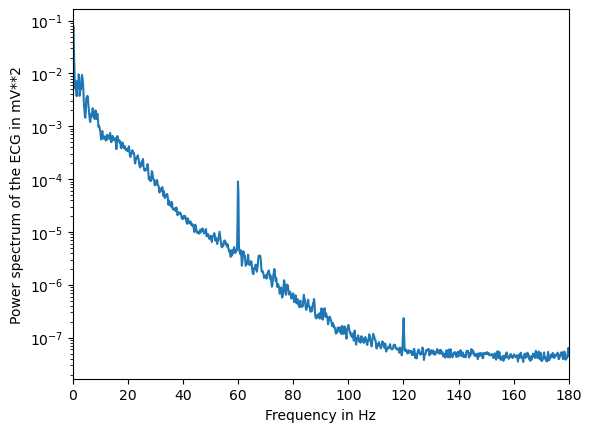

In [14]:
'''Son olarak, güç spektrumunun incelenmesi, 
biyosinyallerin çoğunun daha düşük frekanslardan oluştuğunu ortaya koymaktadır.
60 Hz'de şebeke elektriğinin oluşturduğu gürültü net bir şekilde gözlemlenebilmektedir.'''
from scipy.signal import welch
f, Pxx = welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.xlim(f[[0, -1]])
plt.show()